<a href="https://colab.research.google.com/github/BrunoBerval/dio_project3/blob/main/M%C3%A9tricas_de_avalia%C3%A7%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Matriz de Confusão e Cálculo de Métricas de Avaliação de Aprendizado

A avaliação de modelos de aprendizado de máquina desempenha um papel crucial no desenvolvimento de sistemas de classificação eficientes e confiáveis. Neste projeto, exploraremos a matriz de confusão como ferramenta central para calcular métricas de desempenho de modelos de classificação. A matriz de confusão oferece uma visão estruturada dos resultados de previsão, distinguindo verdadeiros positivos (VP), verdadeiros negativos (VN), falsos positivos (FP) e falsos negativos (FN) e a partir dela é possível implementar as fórmulas e métodos necessários para calcular métricas como acurácia, sensibilidade (recall), especificidade, precisão e F-score. Essas métricas permitem avaliar a eficácia e a robustez de um modelo em diferentes cenários, proporcionando insights detalhados sobre seu desempenho.
Para fins de aprendizado, utilizaremos uma matriz de confusão definida de forma arbitrária, destacando como cada métrica é derivada e interpretada.



---
#Confusion Matrix and Calculation of Learning Evaluation Metrics

The evaluation of machine learning models plays a crucial role in developing efficient and reliable classification systems. In this project, we will explore the confusion matrix as a central tool for calculating performance metrics of classification models. The confusion matrix provides a structured view of prediction results, distinguishing true positives (TP), true negatives (TN), false positives (FP), and false negatives (FN). From this, it becomes possible to implement the necessary formulas and methods to calculate metrics such as accuracy, sensitivity (recall), specificity, precision, and F-score. These metrics allow us to assess the effectiveness and robustness of a model in various scenarios, offering detailed insights into its performance.

For learning purposes, we will use an arbitrarily defined confusion matrix, emphasizing how each metric is derived and interpreted.



In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing.image import ImageDataGenerator

Para este projeto utilizaremos o dataset CIFAR-10 (Canadian Institute for Advanced Research) que é um conjunto de dados amplamente utilizado para tarefas de aprendizado de máquina, especialmente na área de visão computacional. Ele contém 60.000 imagens coloridas no total, divididas em 10 classes (Neste projeto utilizaremos apenas 7 classes: Bird, Cat, Deer, Dog, Frog, Horse ), eada imagem possui 32x32 pixels e 3 canais de cor (RGB).
Devido a baixa resolução das imagens e o tipo de rede que estamos utlizando veremos que o modelo do projeto não terá um bom resultado, mas   será possível visualizar como são geradas e a importância das métricas de avaliação.



---
For this project, we will use the CIFAR-10 dataset (Canadian Institute for Advanced Research), which is widely used for machine learning tasks, particularly in the field of computer vision. It contains a total of 60,000 color images divided into 10 classes (in this project, we will use only 7 classes: Bird, Cat, Deer, Dog, Frog, Horse). Each image is 32x32 pixels in size and has 3 color channels (RGB).

Due to the low resolution of the images and the type of network we are using, the project's model will not achieve optimal results. However, it will allow us to observe how evaluation metrics are generated and understand their importance.


In [2]:
# Carregar o dataset CIFAR-10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Selecionar as classes desejadas (Bird, Cat, Deer, Dog, Frog, Horse)
classes = [2, 3, 4, 5, 6, 7]  # Classes correspondentes no CIFAR-10
x_train_selected = x_train[np.isin(y_train, classes).flatten()]
y_train_selected = y_train[np.isin(y_train, classes).flatten()]
x_test_selected = x_test[np.isin(y_test, classes).flatten()]
y_test_selected = y_test[np.isin(y_test, classes).flatten()]

# Ajustar os índices das classes para 0, 1, 2, 3, 4, 5
class_mapping = {2: 0, 3: 1, 4: 2, 5: 3, 6: 4, 7: 5}
y_train_selected = np.array([class_mapping[label[0]] for label in y_train_selected])
y_test_selected = np.array([class_mapping[label[0]] for label in y_test_selected])

# Normalização das imagens
x_train_selected = x_train_selected.astype('float32') / 255.0
x_test_selected = x_test_selected.astype('float32') / 255.0

# Converter as labels para uma forma categórica (one-hot encoding)
y_train_selected = tf.keras.utils.to_categorical(y_train_selected, 6)
y_test_selected = tf.keras.utils.to_categorical(y_test_selected, 6)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 8s 0us/step


Carregando o carrega o modelo VGG-16 com pesos pré-treinados no dataset ImageNet. O VGG16 é uma rede neural convolucional profunda (CNN) amplamente utilizada em tarefas de visão computacional, foi desenvolvida pelo grupo de pesquisa Visual Geometry Group (VGG) da Universidade de Oxford.



---


Loading the VGG-16 model with pre-trained weights from the ImageNet dataset. VGG-16 is a deep convolutional neural network (CNN) widely used in computer vision tasks, developed by the Visual Geometry Group (VGG) at the University of Oxford.

In [3]:

# Carregar o modelo VGG-16 com pesos do ImageNet
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


Realização de transfer learning do modelo VGG-16 para o dataset selecionado CIFAR-10



---

Performing transfer learning of the VGG-16 model to CIFAR-10 dataset.

In [4]:
# Congelar as camadas do modelo VGG-16
for layer in base_model.layers:
    layer.trainable = False

# Adicionar uma camada de Pooling e uma camada de Classificação (fully connected)
x = layers.GlobalAveragePooling2D()(base_model.output)
x = layers.Dense(6, activation='softmax')(x)

# Criar o modelo final
model = models.Model(inputs=base_model.input, outputs=x)

# Compilar o modelo
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Treinar a última camada do modelo
history = model.fit(x_train_selected, y_train_selected, epochs=6, batch_size=32, validation_data=(x_test_selected, y_test_selected))

Epoch 1/6
938/938 ━━━━━━━━━━━━━━━━━━━━ 15s 12ms/step - accuracy: 0.4377 - loss: 1.4668 - val_accuracy: 0.5478 - val_loss: 1.2186
Epoch 2/6
938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.5576 - loss: 1.1845 - val_accuracy: 0.5698 - val_loss: 1.1632
Epoch 3/6
938/938 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.5788 - loss: 1.1309 - val_accuracy: 0.5818 - val_loss: 1.1363
Epoch 4/6
938/938 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - accuracy: 0.5843 - loss: 1.1180 - val_accuracy: 0.5793 - val_loss: 1.1286
Epoch 5/6
938/938 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.6009 - loss: 1.0791 - val_accuracy: 0.5842 - val_loss: 1.1115
Epoch 6/6
938/938 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.6035 - loss: 1.0793 - val_accuracy: 0.5825 - val_loss: 1.1094


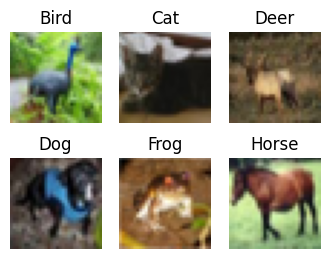

In [5]:
# Mapeando as classes
class_names = ['Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse']

# Plotando uma imagem de cada classe
fig, axes = plt.subplots(2, 3, figsize=(4, 3))

for i, ax in enumerate(axes.flat):
    class_images = x_train_selected[y_train_selected.argmax(axis=1) == i]
    ax.imshow(class_images[0])  # Seleciona a primeira imagem de cada classe
    ax.set_title(class_names[i])
    ax.axis('off')

plt.show()

##Matriz de Confusão

A matriz de confusão é uma tabela que permite avaliar o desempenho de um modelo de classificação, comparando as previsões feitas pelo modelo com os valores reais. Ela exibe os verdadeiros positivos (TP), verdadeiros negativos (TN), falsos positivos (FP) e falsos negativos (FN), proporcionando uma visão detalhada de como o modelo está acertando ou errando nas diferentes classes.

###Como é gerada a matriz de confusão na célula de código abaixo:
**Previsões:**
y_pred = model.predict(x_test_selected) realiza previsões para o conjunto de teste.

**Conversão de previsões:**
np.argmax(y_pred, axis=1) converte as previsões (que estão em formato "one-hot encoding") para índices de classes. O mesmo é feito para os rótulos verdadeiros com y_true_classes = np.argmax(y_test_selected, axis=1).

**Geração da matriz de confusão:**
tf.math.confusion_matrix(y_true_classes, y_pred_classes, num_classes=6) gera a matriz de confusão, comparando as classes reais (y_true_classes) com as classes previstas (y_pred_classes) para as 6 classes selecionadas.

**Exibição:**
A matriz é convertida em um DataFrame (pd.DataFrame) para facilitar a leitura.
Em seguida, é exibida como um gráfico de calor com a ajuda de seaborn.heatmap(), mostrando visualmente como o modelo classificou as diferentes classes.



---

##Confusion Matrix
The confusion matrix is a table used to evaluate the performance of a classification model by comparing the predictions made by the model with the actual values. It displays the true positives (TP), true negatives (TN), false positives (FP), and false negatives (FN), providing a detailed view of how the model is performing in terms of accuracy or errors across different classes.

###How the confusion matrix is generated in the code below:
**Predictions:**
y_pred = model.predict(x_test_selected) makes predictions for the test set.

**Conversion of predictions:**
np.argmax(y_pred, axis=1) converts the predictions (which are in "one-hot encoding" format) to class indices. The same is done for the true labels with y_true_classes = np.argmax(y_test_selected, axis=1).

**Generation of the confusion matrix:**
tf.math.confusion_matrix(y_true_classes, y_pred_classes, num_classes=6) generates the confusion matrix, comparing the actual classes (y_true_classes) with the predicted classes (y_pred_classes) for the 6 selected classes.

**Display:**
The matrix is converted into a DataFrame (pd.DataFrame) for easier reading. It is then displayed as a heatmap using seaborn.heatmap(), visually showing how the model classified the different classes.

188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step
       Bird  Cat  Deer  Dog  Frog  Horse
Bird    586   89   103   52    99     71
Cat     112  503    56  111   136     82
Deer    132   90   527   22   113    116
Dog      94  234    58  451    65     98
Frog     80  101    67   36   705     11
Horse    64   77    74   43    19    723


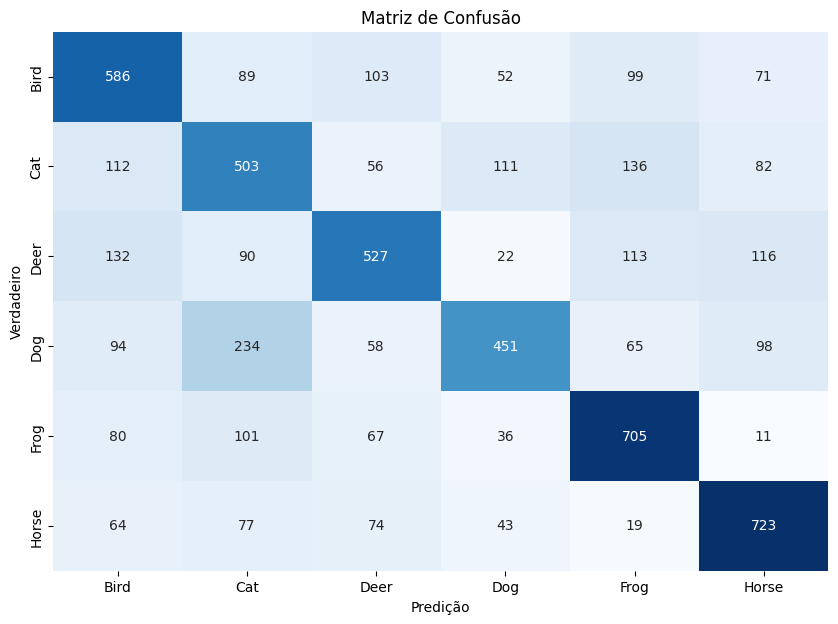

In [6]:
# 1. Realizar previsões no conjunto de teste
y_pred = model.predict(x_test_selected)

# 2. Converter as previsões para as classes (em vez de one-hot encoding)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test_selected, axis=1)

# 3. Gerar a matriz de confusão
conf_matrix = tf.math.confusion_matrix(y_true_classes, y_pred_classes, num_classes=6)

# 4. Criar um DataFrame para exibir a matriz de confusão de forma mais legível
class_names = ['Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse']
conf_matrix_df = pd.DataFrame(conf_matrix.numpy(), index=class_names, columns=class_names)

# 5. Exibir a matriz de confusão
print(conf_matrix_df)

# 6. Visualizar a matriz de confusão usando o seaborn
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix_df, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=class_names, yticklabels=class_names)

plt.xlabel('Predição')
plt.ylabel('Verdadeiro')
plt.title('Matriz de Confusão')
plt.show()

##Métricas de Avaliação


---
##Evaluation Metrics


**Sensibilidade:** Capacidade de identificar corretamente as instâncias positivas.



---

**Sensitivity or recall or TPR (True Positive Rate):** Ability to correctly identify positive instances.

In [7]:
# Função para calcular a sensibilidade (recall) para cada classe
def calcular_sensibilidade(conf_matrix):
    # Extrair os valores da matriz de confusão
    VP = np.diag(conf_matrix)  # Elementos da diagonal (verdadeiros positivos)
    FN = np.sum(conf_matrix, axis=1) - VP  # Falsos negativos: soma das linhas - VP

    # Calcular sensibilidade para cada classe
    sensibilidade = VP / (VP + FN)
    return sensibilidade

# Calcular a sensibilidade
sensibilidade = calcular_sensibilidade(conf_matrix.numpy())

# Exibir sensibilidade para cada classe
for i, classe in enumerate(class_names):
    print(f"Sensibilidade para a classe '{classe}': {sensibilidade[i]:.4f}")


Sensibilidade para a classe 'Bird': 0.5860
Sensibilidade para a classe 'Cat': 0.5030
Sensibilidade para a classe 'Deer': 0.5270
Sensibilidade para a classe 'Dog': 0.4510
Sensibilidade para a classe 'Frog': 0.7050
Sensibilidade para a classe 'Horse': 0.7230


**Especificidade:** Capacidade de identificar corretamente as instâncias negativas.


---


**Specificity or TNR (True Negative Rate):** Ability to correctly identify negative instances.

In [8]:
# Função para calcular a especificidade para cada classe
def calcular_especificidade(conf_matrix):
    # Extrair os valores da matriz de confusão
    VN = np.diag(conf_matrix)  # Elementos da diagonal (verdadeiros negativos)
    FP = np.sum(conf_matrix, axis=0) - VN  # Falsos positivos: soma das colunas - VN

    # Calcular especificidade para cada classe
    especificidade = VN / (VN + FP)
    return especificidade

# Calcular a especificidade
especificidade = calcular_especificidade(conf_matrix.numpy())

# Exibir especificidade para cada classe
for i, classe in enumerate(class_names):
    print(f"Especificidade para a classe '{classe}': {especificidade[i]:.4f}")


Especificidade para a classe 'Bird': 0.5487
Especificidade para a classe 'Cat': 0.4598
Especificidade para a classe 'Deer': 0.5955
Especificidade para a classe 'Dog': 0.6308
Especificidade para a classe 'Frog': 0.6201
Especificidade para a classe 'Horse': 0.6567


**Acurácia:** A acurácia é a soma dos verdadeiros positivos (VP) dividida pelo total de instâncias na matriz de confusão.


---

**Accuracy:** Accuracy is the sum of true positives (TP) divided by the total number of instances in the confusion matrix.


In [9]:
# Função para calcular a acurácia
def calcular_acuracia(conf_matrix):
    # Extrair os valores da matriz de confusão
    VP = np.diag(conf_matrix)  # Elementos da diagonal (verdadeiros positivos)
    total = np.sum(conf_matrix)  # Total de todas as instâncias

    # Calcular acurácia
    acuracia = np.sum(VP) / total
    return acuracia

# Calcular a acurácia
acuracia = calcular_acuracia(conf_matrix.numpy())

# Exibir a acurácia
print(f"Acurácia: {acuracia:.4f}")

Acurácia: 0.5825


**Precisão:** A precisão para cada classe é calculada como a razão entre os verdadeiros positivos (VP) e a soma dos verdadeiros positivos e falsos positivos (FP).



---
**Precision:** Precision for each class is calculated as the ratio of true positives (TP) to the sum of true positives and false positives (FP).


In [10]:
# Função para calcular a precisão para cada classe
def calcular_precisao(conf_matrix):
    # Extrair os valores da matriz de confusão
    VP = np.diag(conf_matrix)  # Elementos da diagonal (verdadeiros positivos)
    FP = np.sum(conf_matrix, axis=0) - VP  # Falsos positivos: soma das colunas - VP

    # Calcular precisão para cada classe
    precisao = VP / (VP + FP)
    return precisao

# Calcular a precisão
precisao = calcular_precisao(conf_matrix.numpy())

# Exibir precisão para cada classe
for i, classe in enumerate(class_names):
    print(f"Precisão para a classe '{classe}': {precisao[i]:.4f}")


Precisão para a classe 'Bird': 0.5487
Precisão para a classe 'Cat': 0.4598
Precisão para a classe 'Deer': 0.5955
Precisão para a classe 'Dog': 0.6308
Precisão para a classe 'Frog': 0.6201
Precisão para a classe 'Horse': 0.6567


**F-Score:** O F-Score é a média harmônica entre precisão e sensibilidade. Ele combina as duas métricas em uma única medida, equilibrando a performance do modelo, especialmente quando há um trade-off entre as duas.



---

**F-Score:** The F-Score is the harmonic mean of precision and sensitivity. It combines the two metrics into a single measure, balancing the model's performance, especially when there is a trade-off between them.

In [11]:
# Função para calcular o F1-Score para cada classe
def calcular_f1_score(conf_matrix):
    # Extrair os valores da matriz de confusão
    VP = np.diag(conf_matrix)  # Elementos da diagonal (verdadeiros positivos)
    FP = np.sum(conf_matrix, axis=0) - VP  # Falsos positivos: soma das colunas - VP
    FN = np.sum(conf_matrix, axis=1) - VP  # Falsos negativos: soma das linhas - VP

    # Calcular precisão e sensibilidade
    precisao = VP / (VP + FP)
    sensibilidade = VP / (VP + FN)

    # Calcular F1-Score (média harmônica entre precisão e sensibilidade)
    f1_score = 2 * (precisao * sensibilidade) / (precisao + sensibilidade)
    return f1_score

# Calcular o F1-Score
f1_score = calcular_f1_score(conf_matrix.numpy())

# Exibir F1-Score para cada classe
for i, classe in enumerate(class_names):
    print(f"F1-Score para a classe '{classe}': {f1_score[i]:.4f}")


F1-Score para a classe 'Bird': 0.5667
F1-Score para a classe 'Cat': 0.4804
F1-Score para a classe 'Deer': 0.5592
F1-Score para a classe 'Dog': 0.5259
F1-Score para a classe 'Frog': 0.6598
F1-Score para a classe 'Horse': 0.6882
